In [1]:
import sys
sys.path.append("../src")

from CSOWP_SR import *
from ExpressionTree import *
from rollingWindow import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pysr import PySRRegressor
import numpy as np
import sympy as smp
import yfinance as yf
import os

import itertools

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
os.path.isfile("report.log")

True

In [3]:
def t1(X):
    return 10*np.exp(-0.5*np.exp(-0.5*X + 2))
X1 = np.linspace(-5, 15, 140)
y1 = t1(X1)

def t2(X):
    return np.exp(-X)
X2 = np.linspace(1, 20, 140)
y2 = t2(X2)

air_passengers = pd.read_csv("data/AirPassengers.csv")
X3 = air_passengers.index
y3 = air_passengers["#Passengers"]

treated_seco = pd.read_csv("data/treated_seco.csv")
treated_seco

treated_seco["eventdate"] = pd.to_datetime(treated_seco["eventdate"])
treated_seco.set_index("eventdate", inplace=True, drop=True)
treated_seco = treated_seco.asfreq("7D")
treated_seco.rename(columns={"Unnamed: 0": "weeks"}, inplace=True)

X4 = treated_seco.weeks[::2].values
y4 = treated_seco.value[::2].values


# sugar = yf.Ticker("SB=F")
# sugar_history = sugar.history(period="1y")
# sugar_history = sugar_history.asfreq("B")

# # Interpolando os dados
# sugar_history = sugar_history.interpolate()

# sugar_history.reset_index(inplace=True)

sugar_data_manip = pd.read_csv("data/sugar_data_manip.csv")
X5 = sugar_data_manip.X.values
y5 = sugar_data_manip.y.values

data = [
    [X1, y1],
    [X2, y2],
    [X3, y3],
    [X4, y4],
    [X5, y5]
]

sns.set_theme("talk")

In [4]:
"Açúcar (Brenddon)"

'Açúcar (Brenddon)'

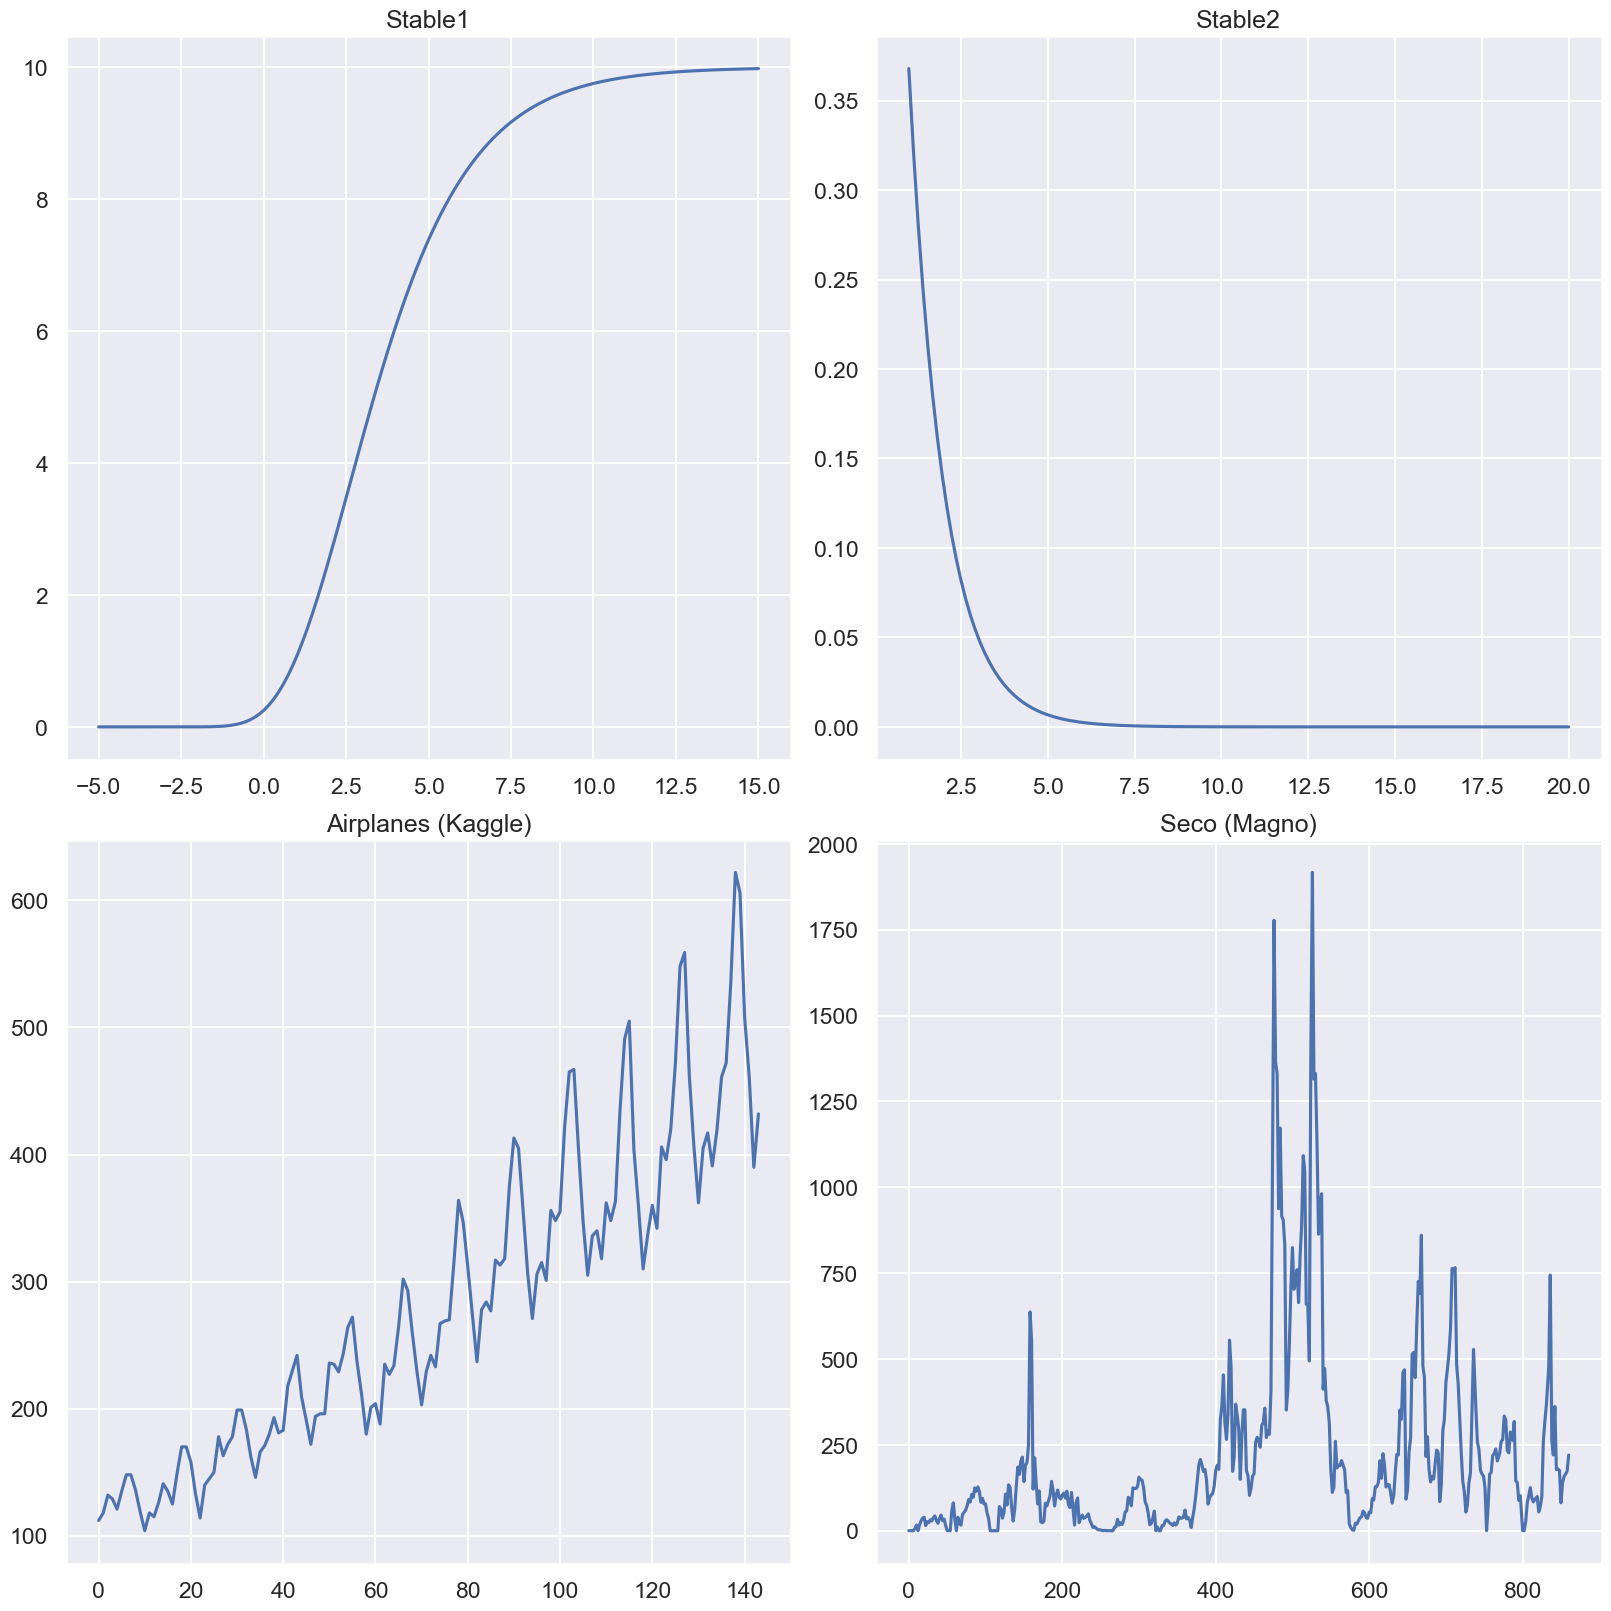

In [5]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 16))
titles = ["Stable1", "Stable2", "Airplanes (Kaggle)", "Seco (Magno)"]

c=0
for ax, current_data in zip(axs.flatten(), data):
    ax.plot(current_data[0], current_data[1])
    ax.set_title(titles[c])
    c += 1

plt.savefig("presentation_figures/test_data1.png", dpi=400)

In [6]:
pyreg = PySRRegressor(
    binary_operators=["+", "-", "*", "/"], 
    unary_operators=["exp", "expp(x) = exp(-x)", "cos", "sin"],
    temp_equation_file=True,
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    extra_sympy_mappings={"expp": lambda x: smp.exp(-x)},
    niterations=60,
    populations=20,
    population_size=60
)

# pyreg.fit(np.c_[X4], y4)

In [7]:
class rollingSR():
    def __init__(self):
        self.SR = PySRRegressor(
            binary_operators=["+", "-", "*", "/"], 
            unary_operators=["exp", "expp(x) = exp(-x)", "cos", "sin"],
            temp_equation_file=True,
            elementwise_loss="loss(prediction, target) = (prediction - target)^2",
            extra_sympy_mappings={"expp": lambda x: smp.exp(-x)},
            niterations=60,
            populations=20,
            population_size=60,
            warm_start=False,
            verbosity=False,
            progress=False
        )

    def fit(self, X, y):
        self.SR.fit(X, y)

    def get_solutions(self):
        return self.SR.sympy().simplify()

RoWi = SRRollingMetric(dir_path="Outputs/Airplane")

start_point_options = [-1, -6, -8, -12, -18, -20, -24]

# for start in start_point_options:
#     RoWi.fit(X3, y3, rollingSR, direction="left", start=X3[start], n_points=3, visualize=True)
#     RoWi.run()
#     plt.plot()




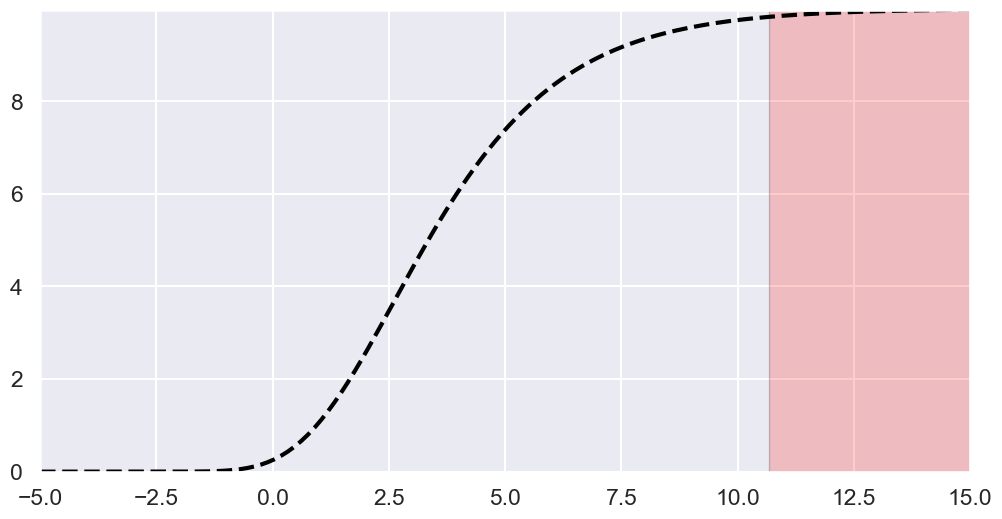

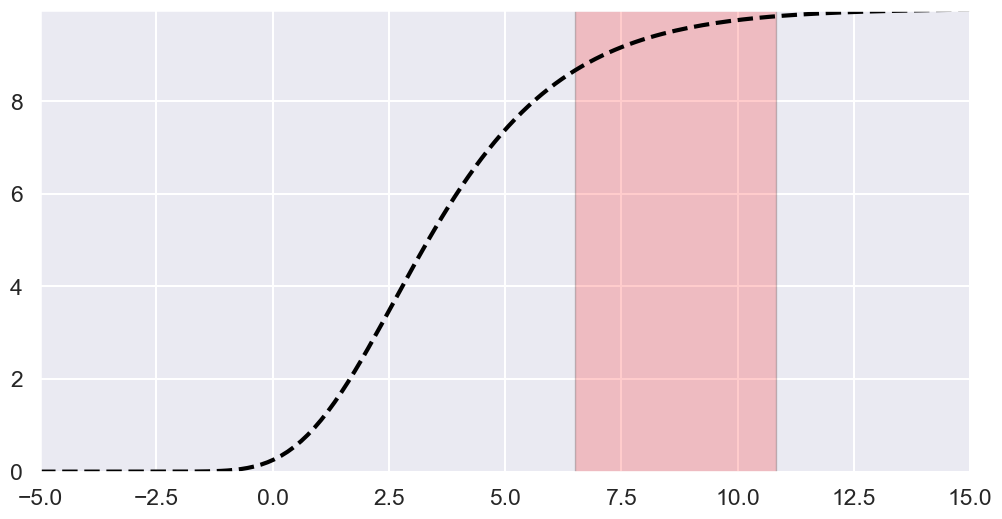

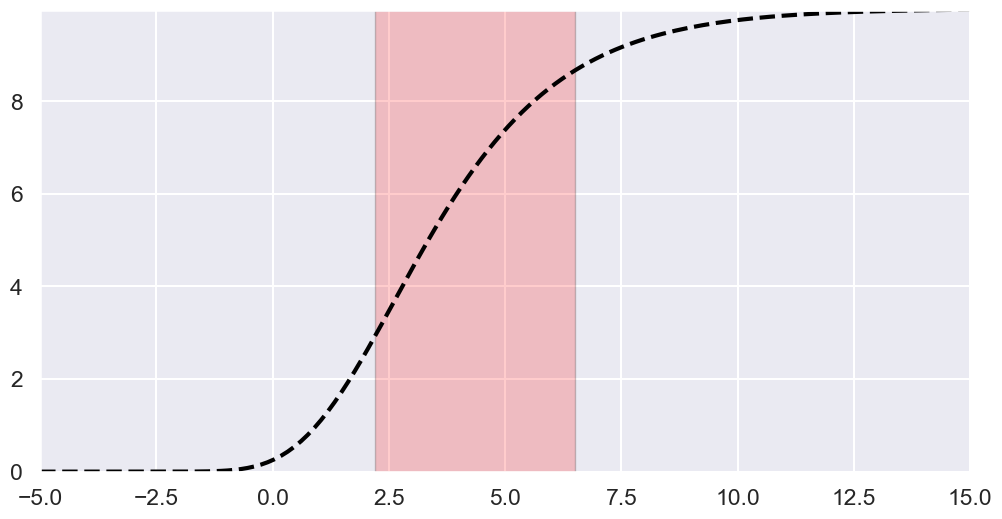

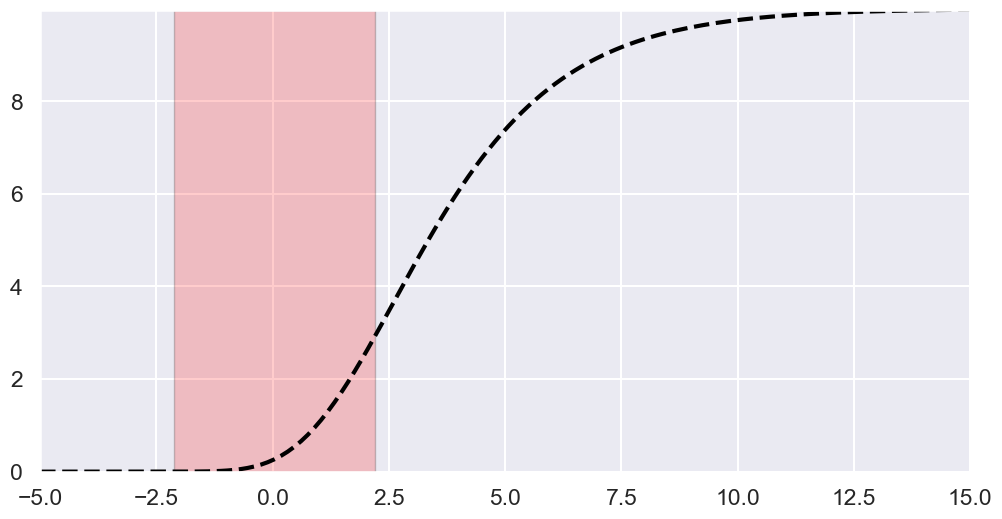

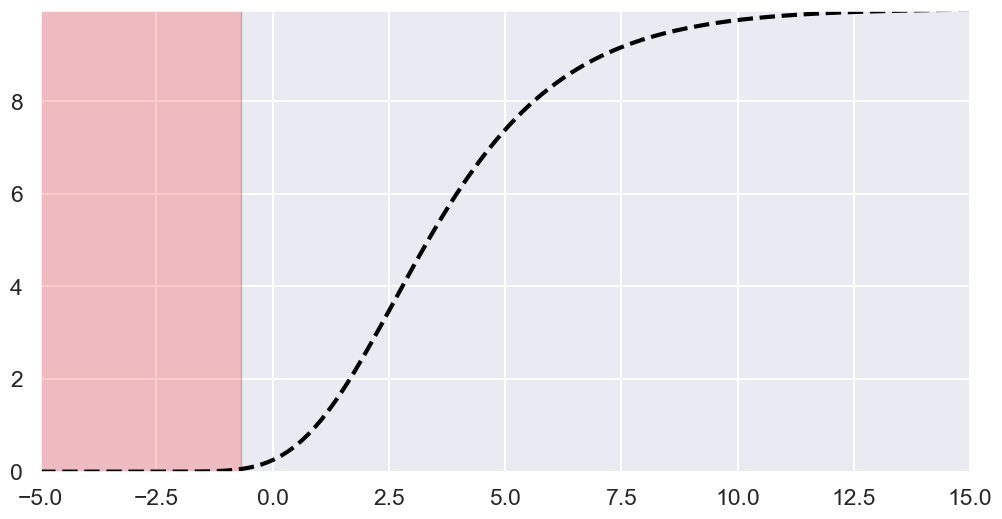

In [8]:
start_points1 = [-1, -30, -60, -90, -110]

for start in start_points1:
    plt.figure(figsize=(12, 6))
    RoWi.fit(X1, y1, rollingSR, direction="left", start=X1[start], n_points=30
    , visualize=True)
    plt.show()

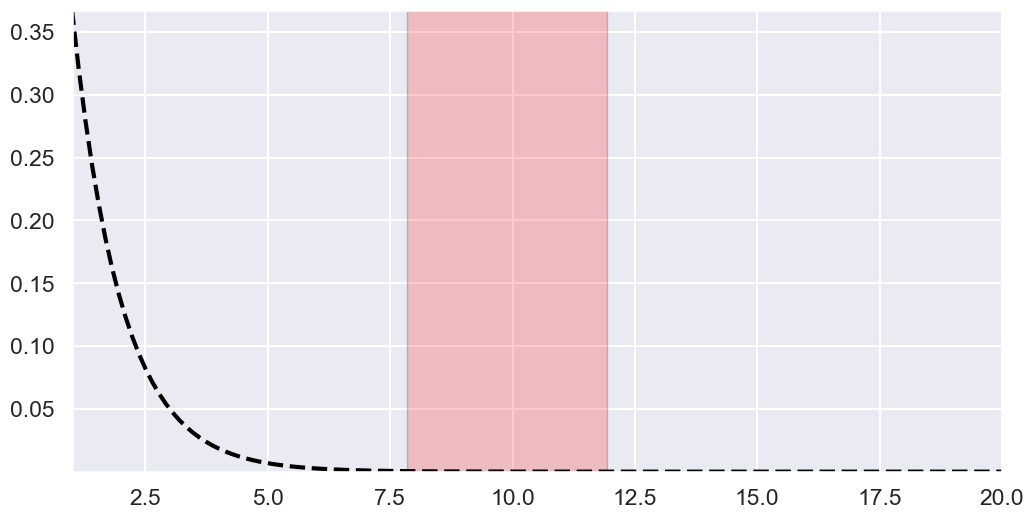

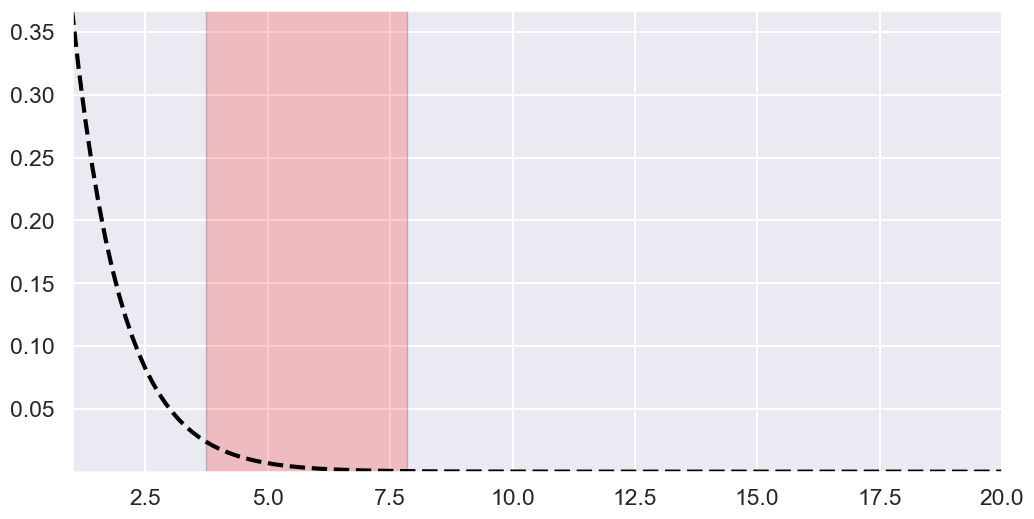

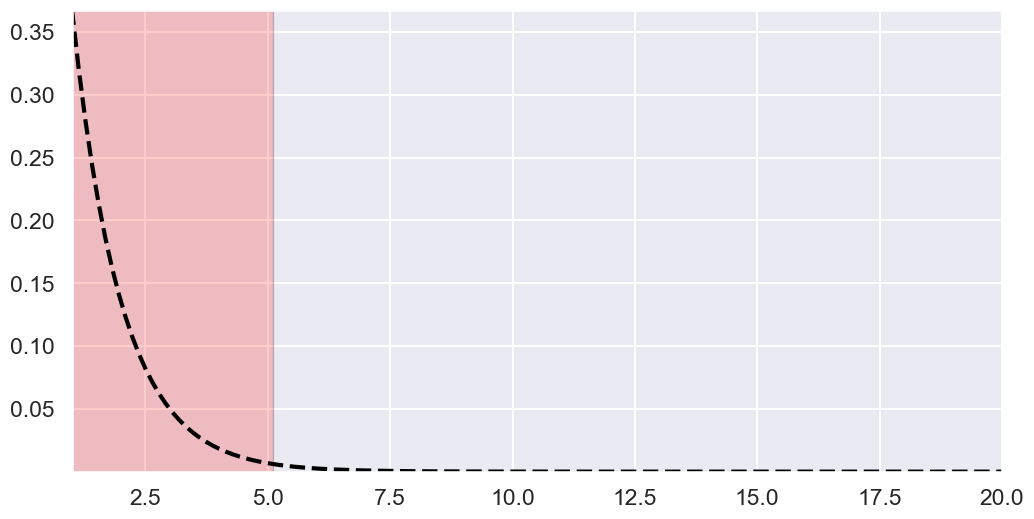

In [9]:
start_points1 = [-60, -90, -110]

for start in start_points1:
    plt.figure(figsize=(12, 6))
    RoWi.fit(X2, y2, rollingSR, direction="left", start=X2[start], n_points=30
    , visualize=True)
    plt.show()

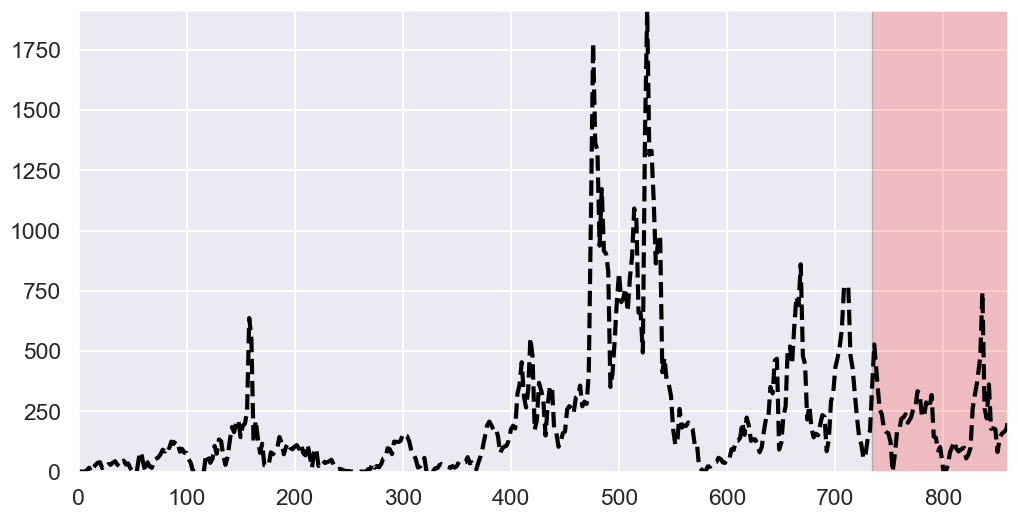

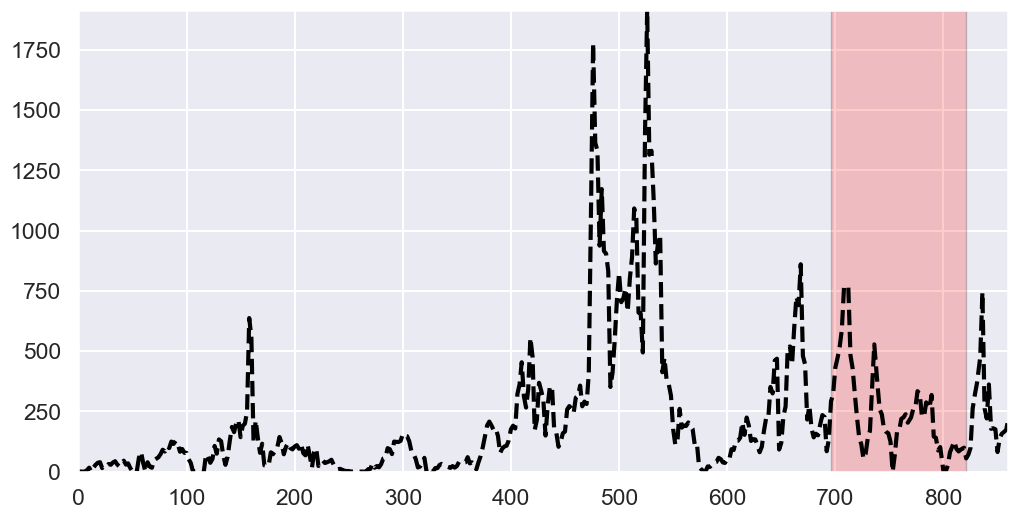

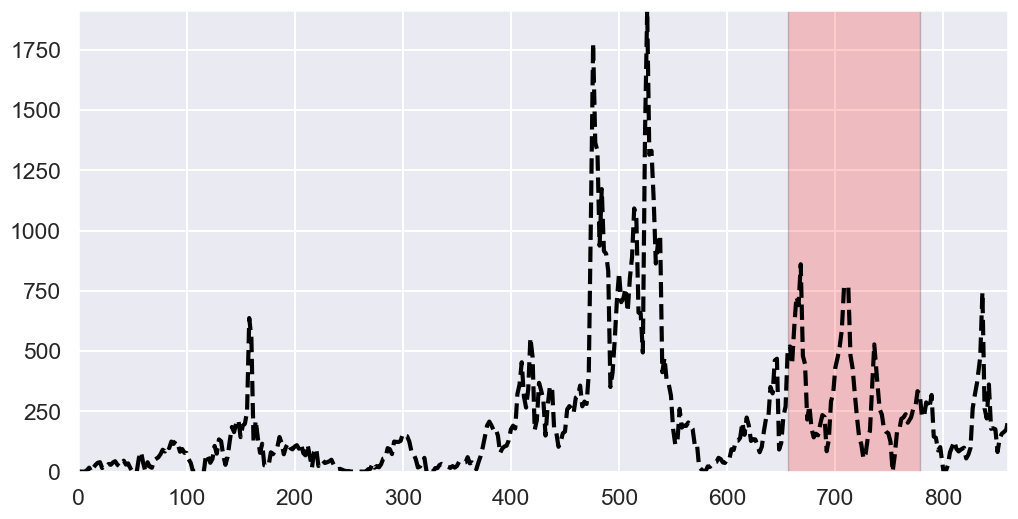

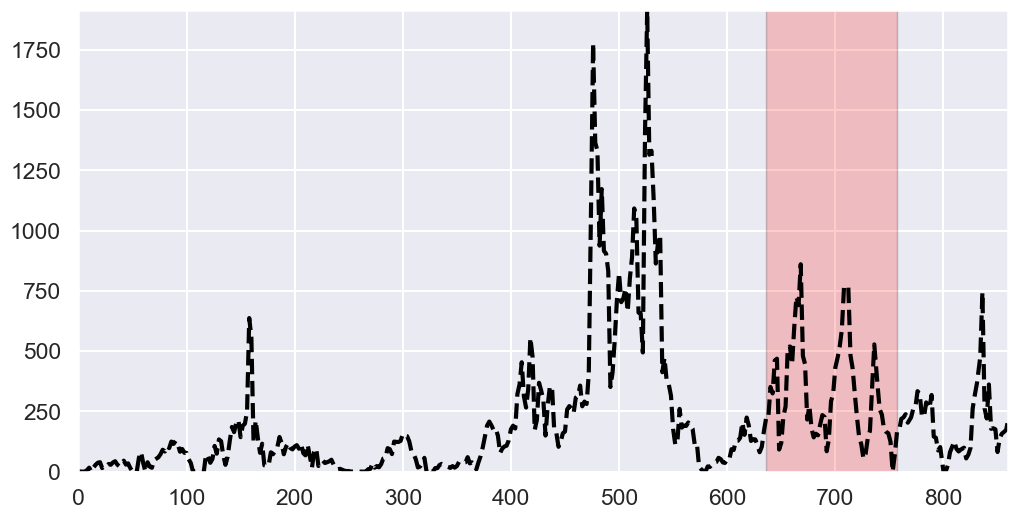

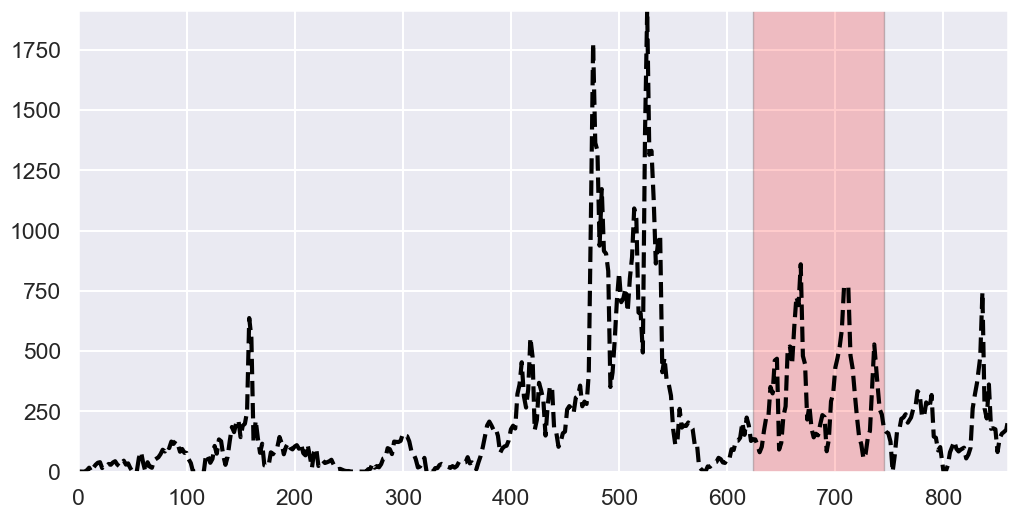

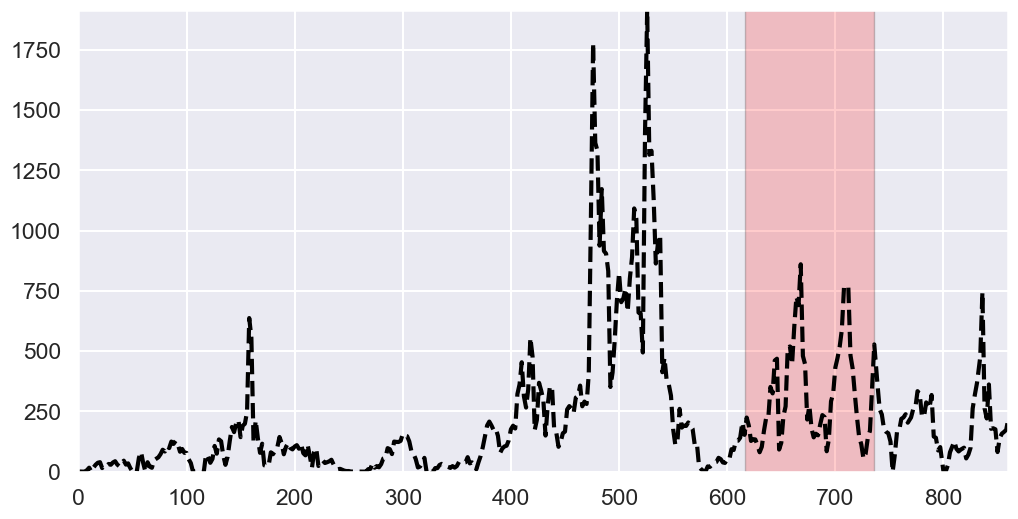

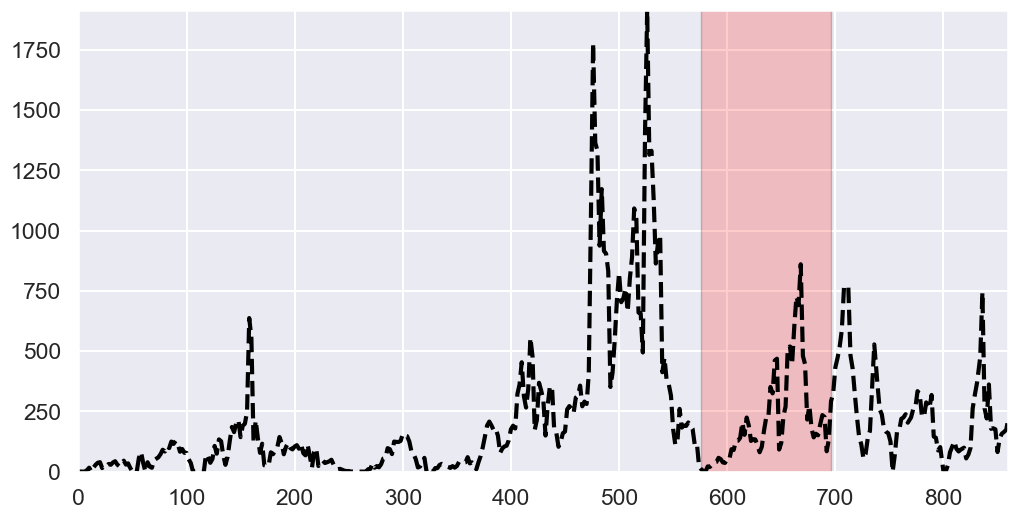

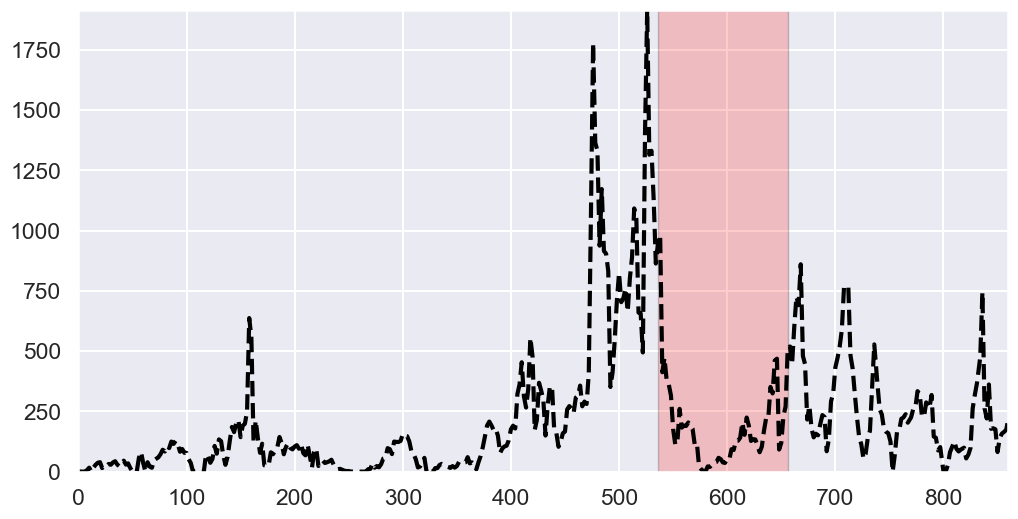

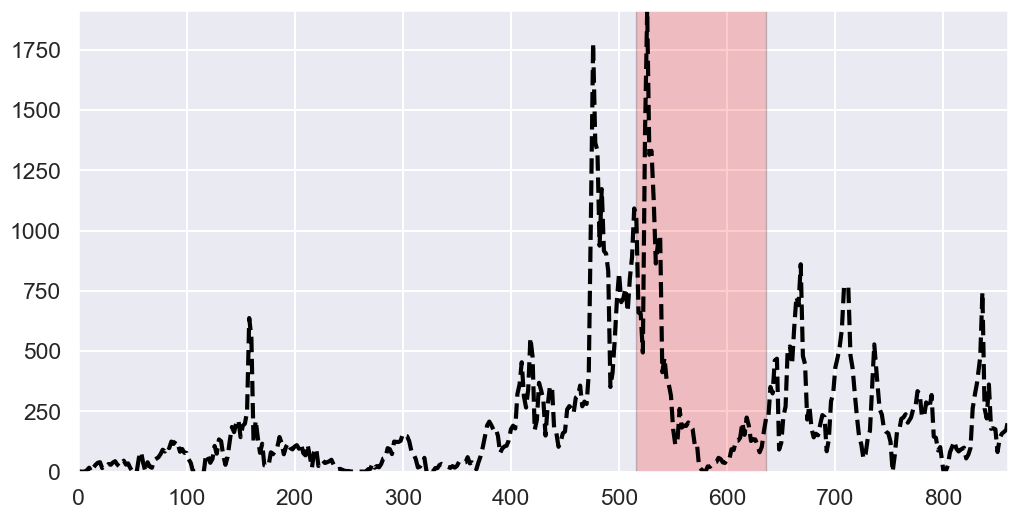

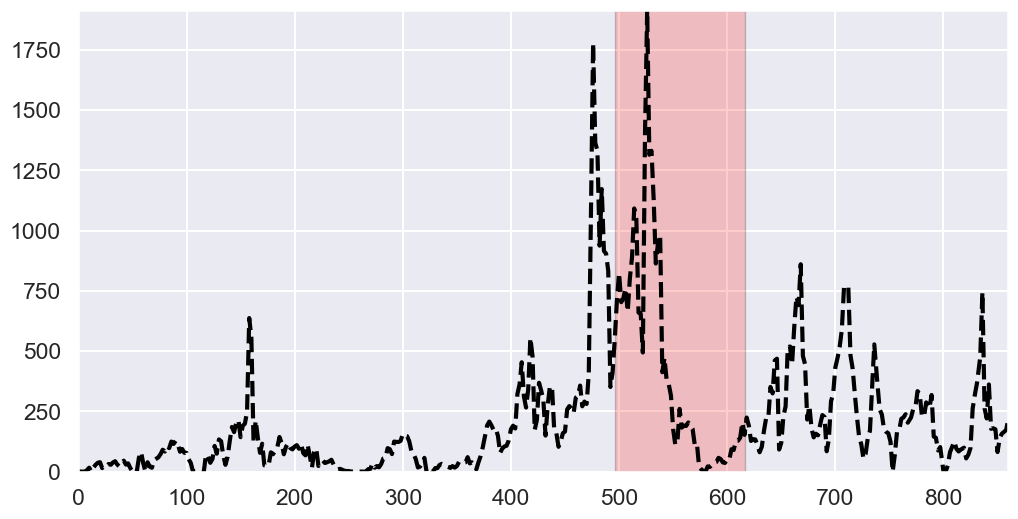

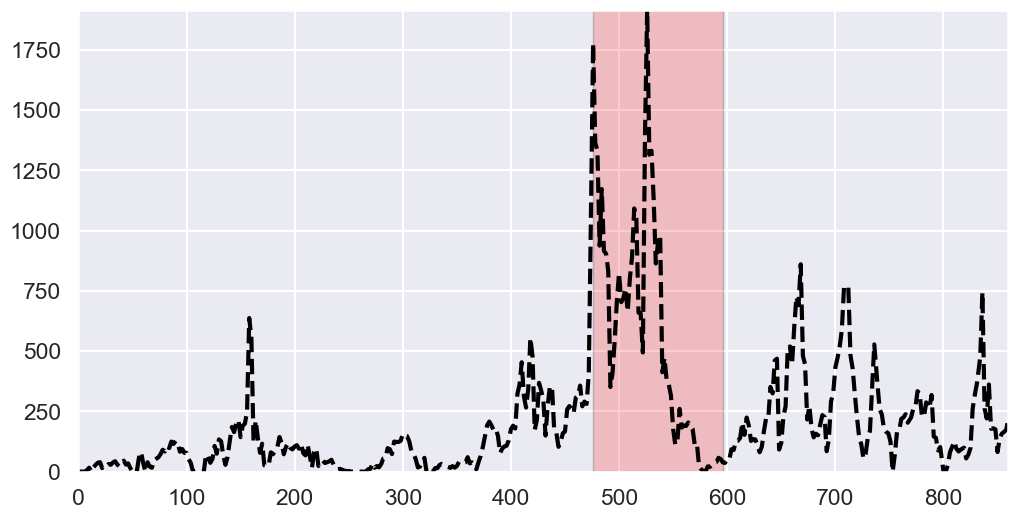

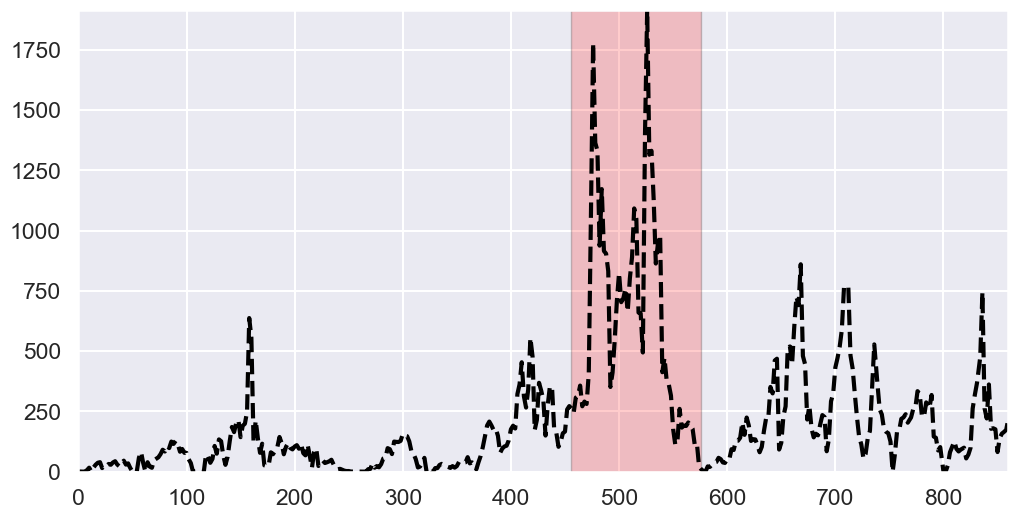

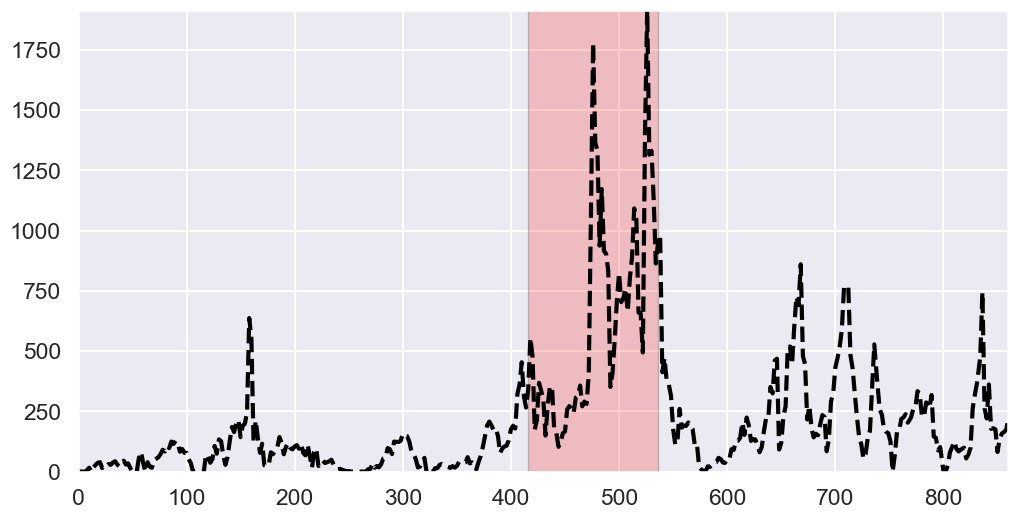

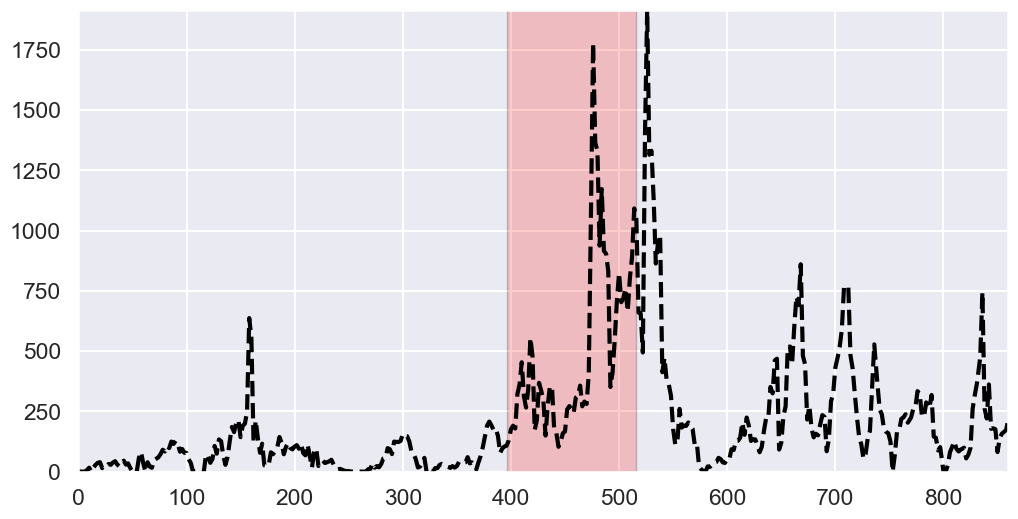

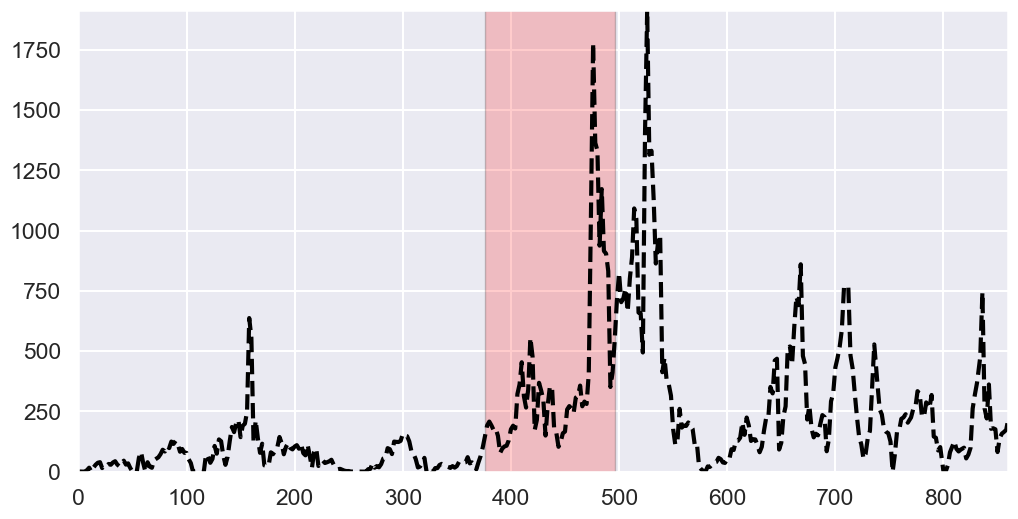

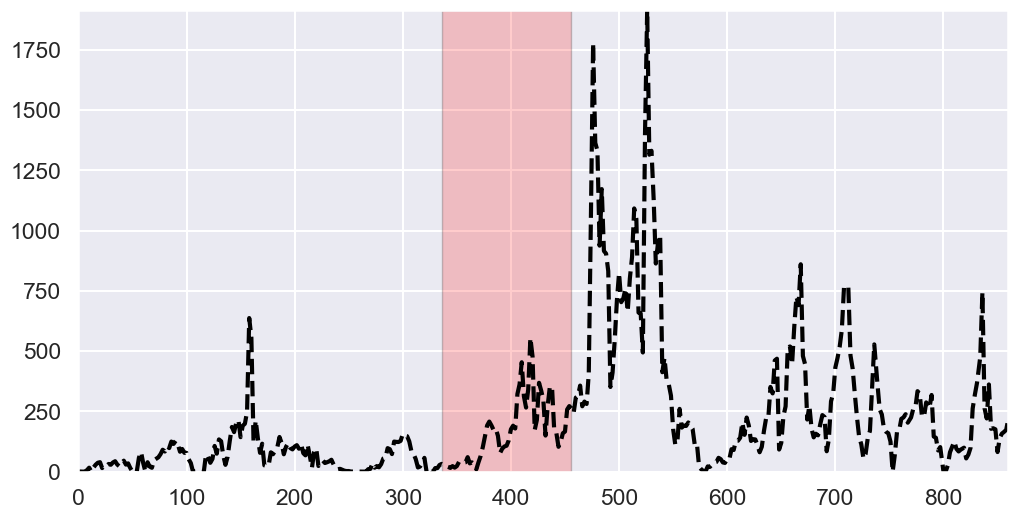

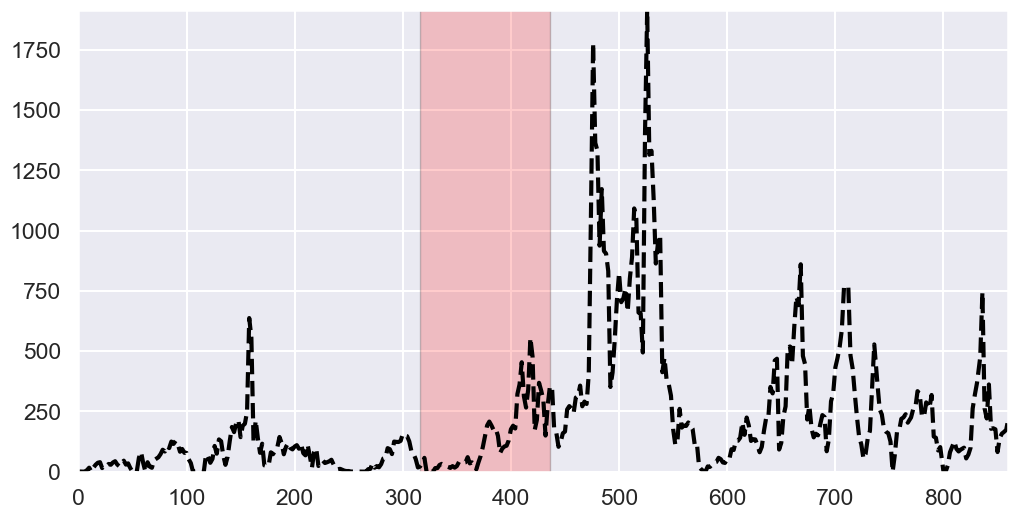

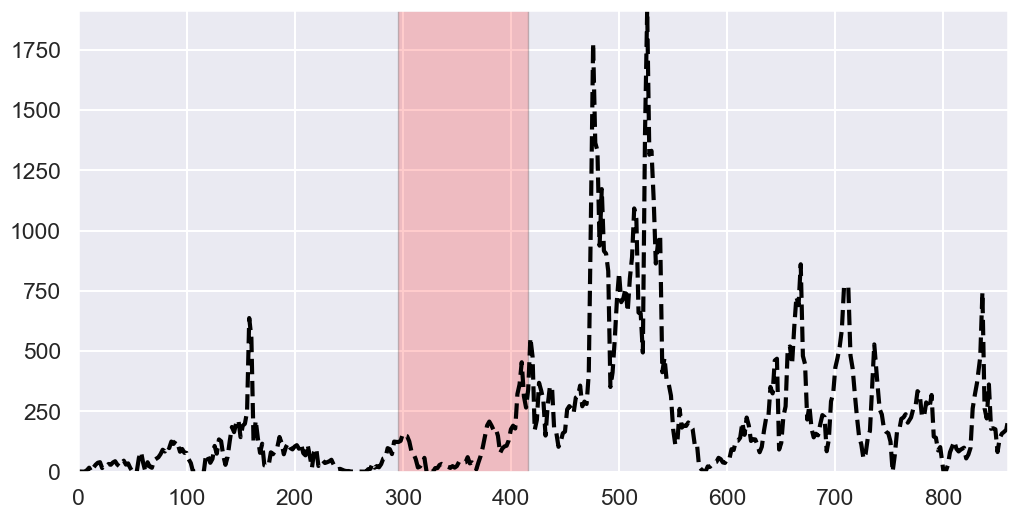

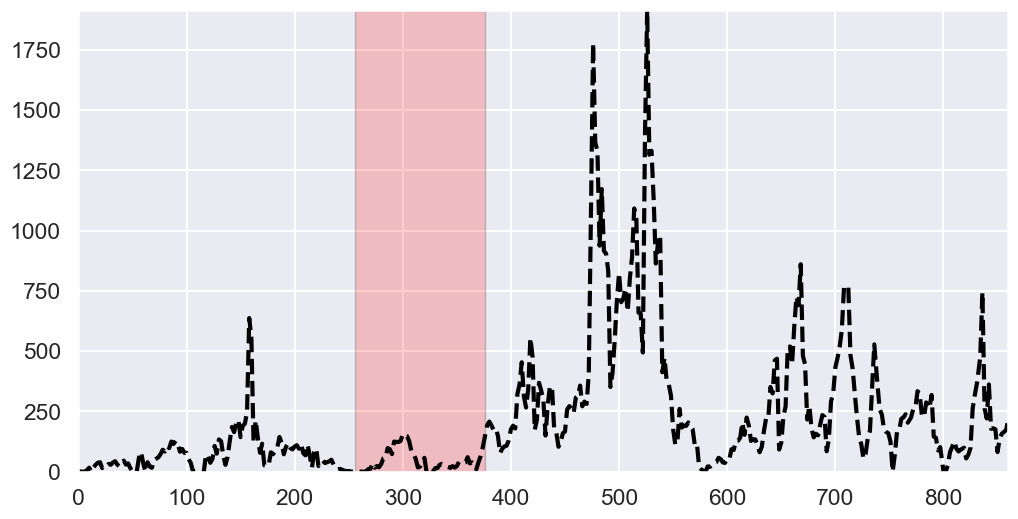

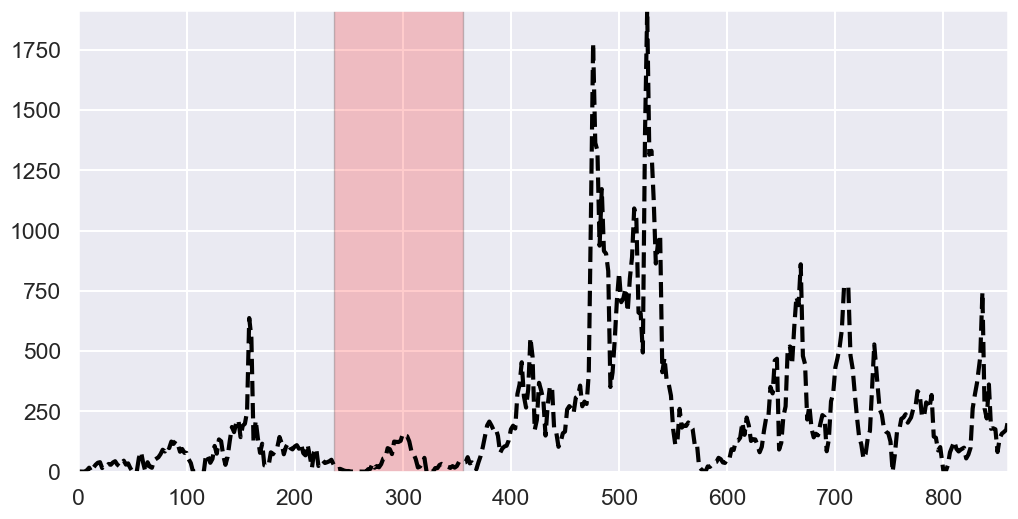

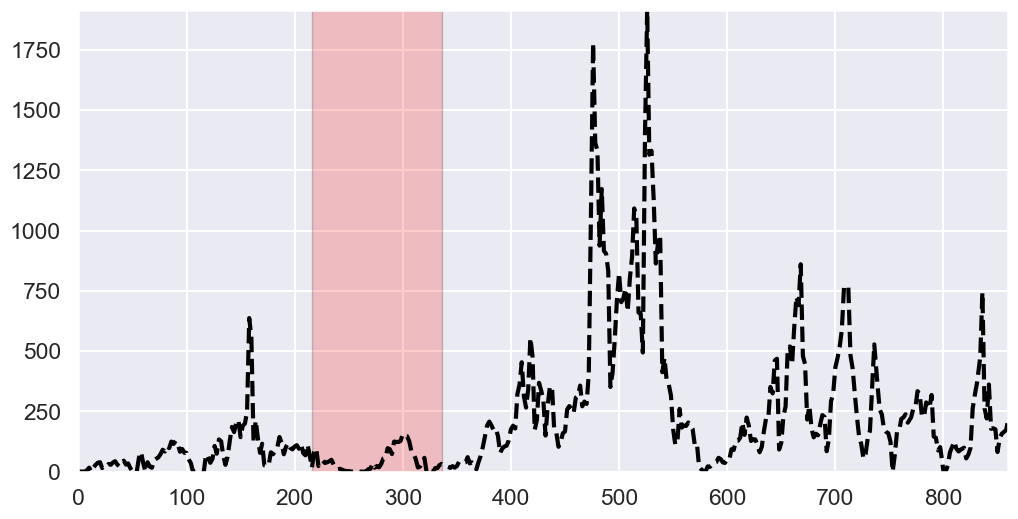

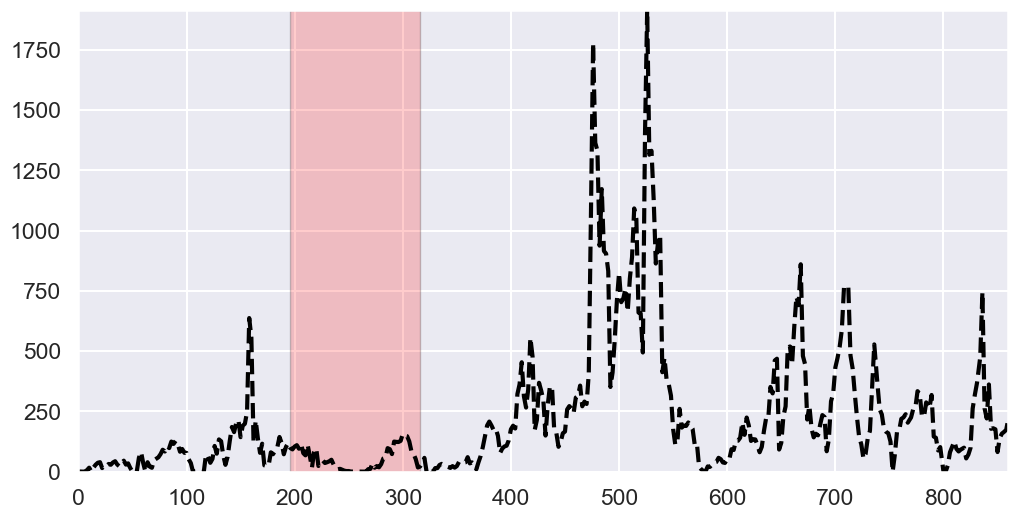

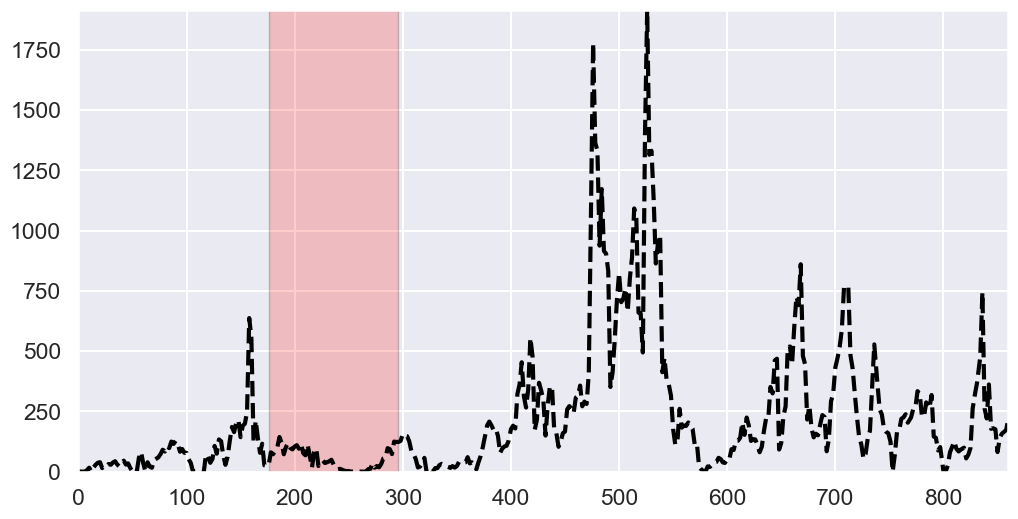

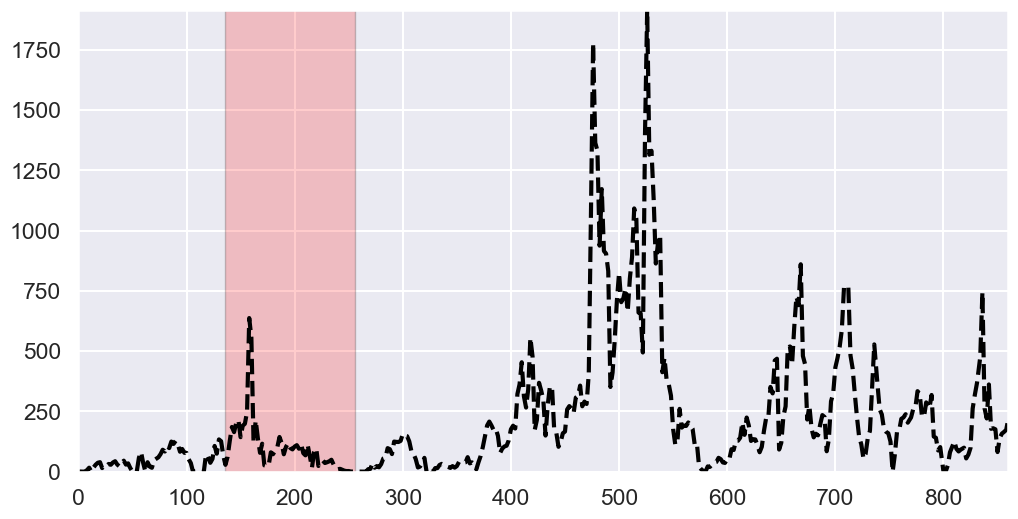

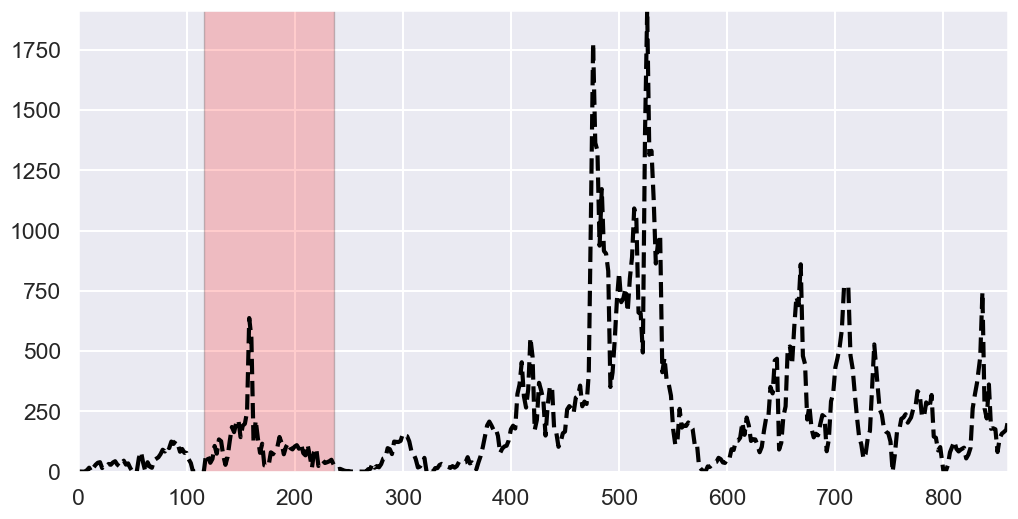

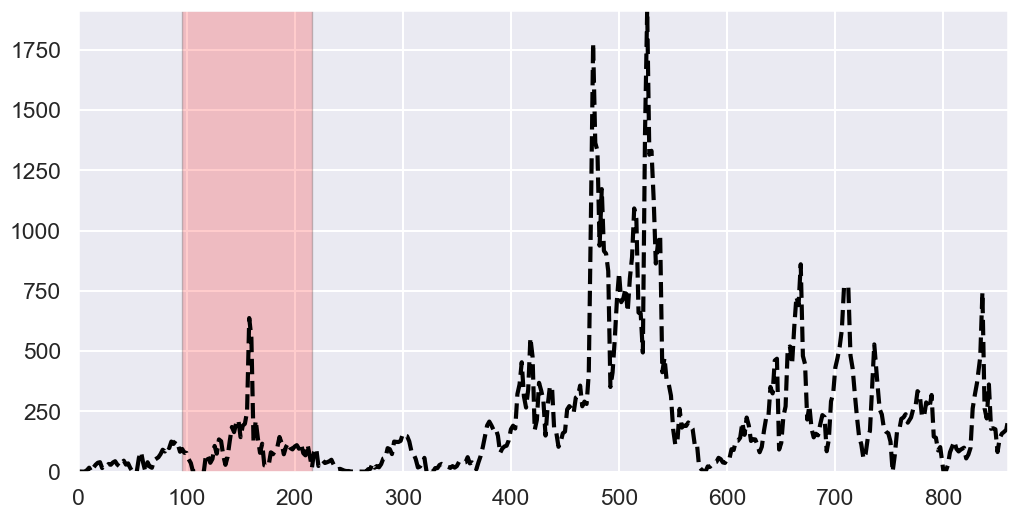

In [10]:
start_points1 = [-1, -20, -40, -50, -56, -60, -80, -100, -110, -120, -130]
start_points2 = [-140, -160, -170, -180, -200, -210, -220]
start_points3 = [-240, -250, -260, -270, -280, -300, -310, -320]

start_points = start_points1 + start_points2 + start_points3


c=0
for start in start_points:
    plt.figure(figsize=(12, 6))
    RoWi.fit(X4, y4, rollingSR, direction="left", start=X4[start], n_points=60
    , visualize=True, save_fig_path=f"presentation_figures/seco_gif/{c}.png")
    c += 1
    plt.show()

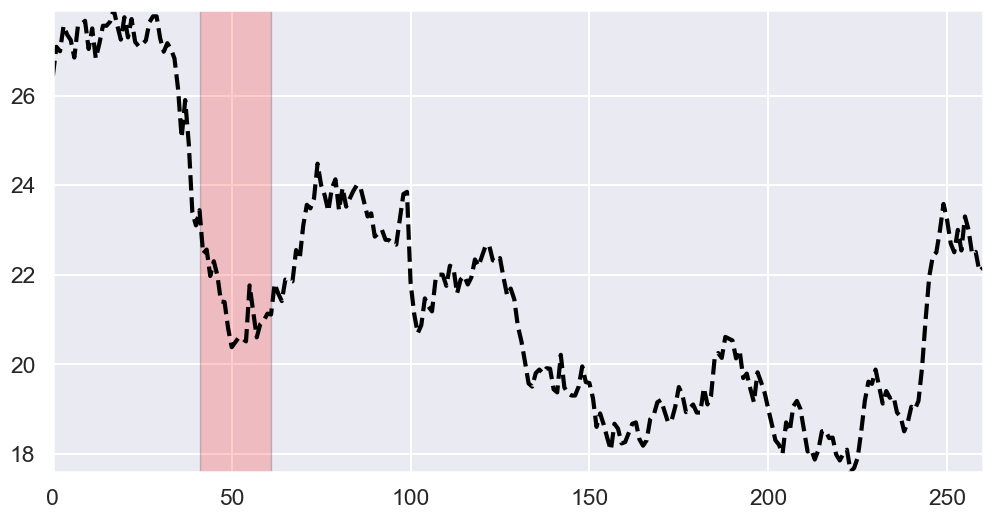

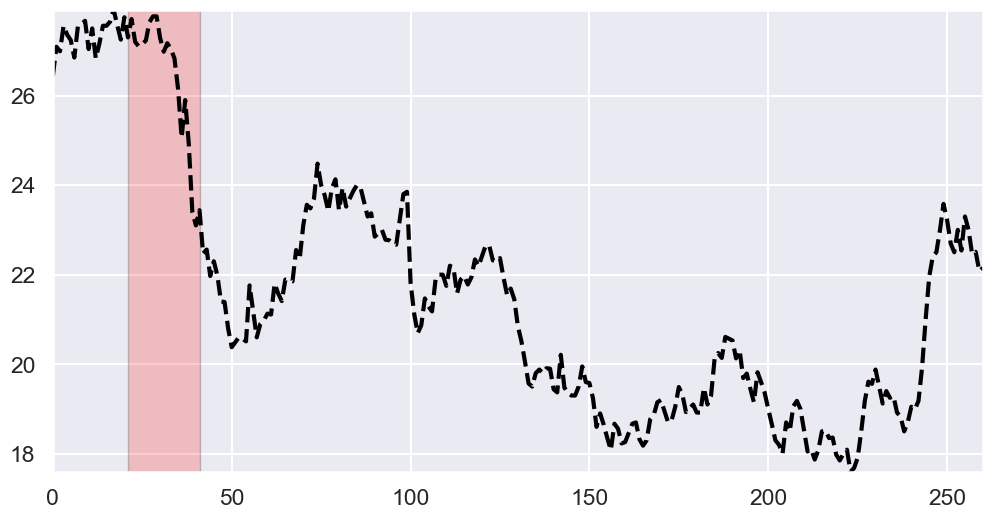

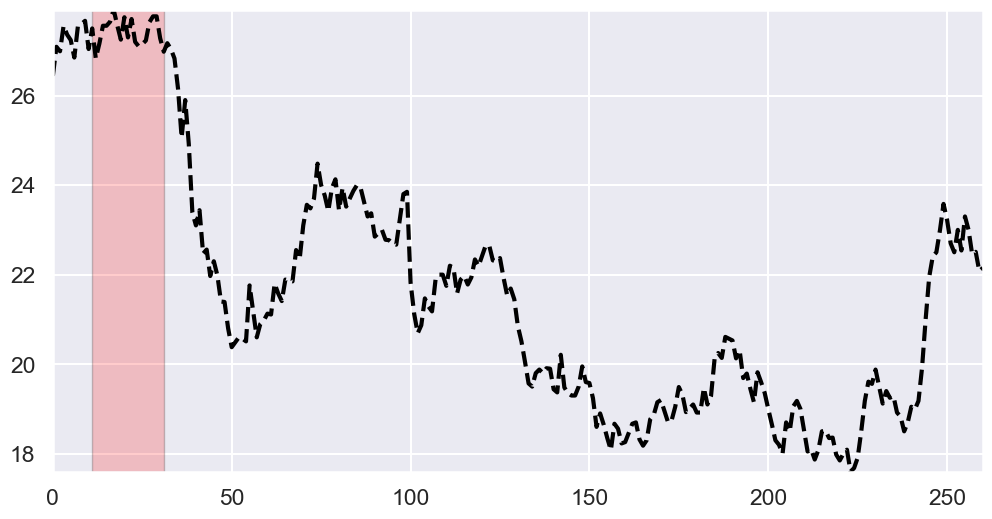

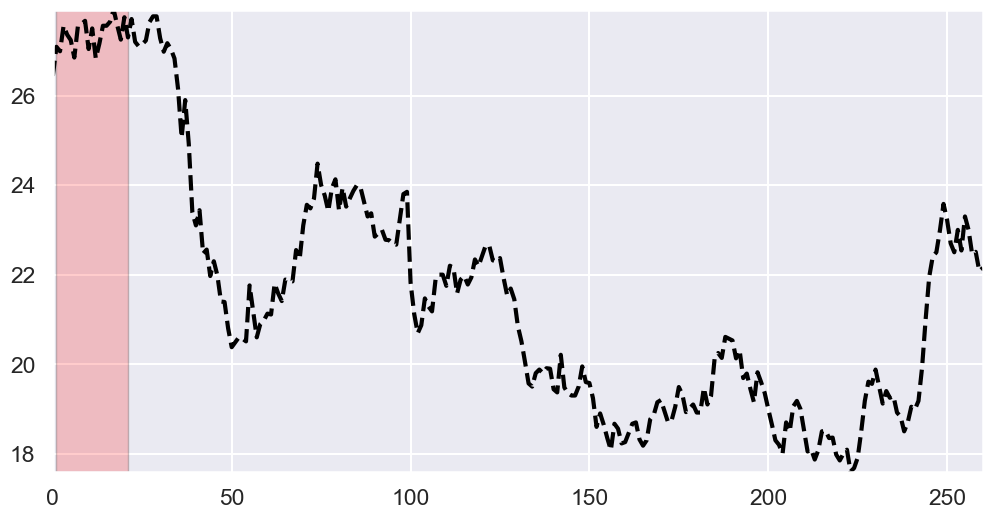

In [25]:
start_points1 = [-1, -20, -40, -60, -80, -100]
start_points2 = [-120, -140, -160, -170, -180]
start_points3 = [-200, -220, -230, -240]

start_points = start_points1 + start_points2 + start_points3

for start in start_points3:
    plt.figure(figsize=(12, 6))
    RoWi.fit(X5, y5, rollingSR, direction="left", start=X5[start], n_points=20
    , visualize=True)
    plt.show()